In [1]:
# load plotting library and src files
using PyPlot;
include("./src/calcpml_2d.jl");
include("./src/yeeder.jl");
include("./src/fdfd.jl");

In [2]:
n = 800;
BC = [0,-2];
Nx2 = n;
Ny2 = n;
Nx = div(Nx2,2);     Ny = div(Ny2,2);
ER2  = ones(Complex64,Nx2,Ny2);
e = 3.56;
L = 1;
RES  = [0.01,0.01];
spc = L;
(dx,dy)=RES;
dx2 = dx/2;
dy2 = dy/2;
ER2[1:end,Int(Nx-L/2/dx2):Int(Nx-4)] = e;
ER2[1:end,Int(Nx+4):Int(Nx+L/2/dx2)] = e;

MUR2 = ones(Complex64,Nx2,Ny2);
NPML = [0 0 40 40]
lambda0 = 1;
Pol = "Hz";
theta = 10;
Q = ones(Complex64,Nx,Ny);
#Q[Int(Nx/2)-Int(L/2/dx)-Int(spc/dx):Int(Nx/2)+Int(L/2/dx)+Int(spc/dx),Int(Nx/2)-Int(L/2/dx)-Int(spc/dx):Int(Nx/2)+Int(L/2/dx)+Int(spc/dx)] = 0;
Q[1:end,Int(Nx/2)-Int(L/2/dx)-Int(spc/dx):Int(Nx/2)+Int(L/2/dx)+Int(spc/dx)] = 0;

(Ex,Ey,Ez,Hx,Hy,Hz) = fdfd(ER2,MUR2,RES,NPML,BC,lambda0,Pol,Q;verbose=false,TFSF=true,theta=theta);

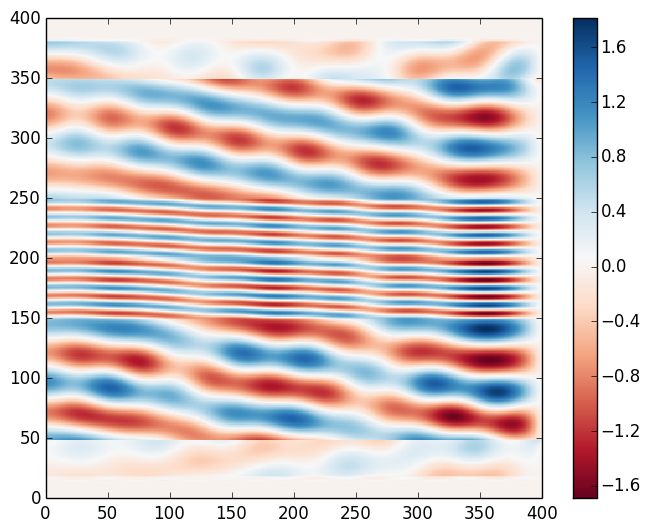

PyObject <matplotlib.colorbar.Colorbar instance at 0x320b18680>

In [4]:
pcolormesh(real(Ez'),cmap="RdBu")
colorbar()